Lab

In [1]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots

In [2]:
import statsmodels.api as sm

In [3]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm

In [4]:
!pip install ISLP

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 39.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 21.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.0/522.0 kB 28.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 24.5 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 815.2/815.2 kB 31.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 926.4/926.4 kB 48.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.7/115.7 kB 8.7 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4031 sha256=723967abfcdf92b00dc291dc9cb478ef538f962c7895d5a8f2d0d9ddd02de113
  Stored in directory: /root/.cache/pip/wheels/25/cc/e0/ef2969164144c899fedb22b338f6703e2b9cf46eeebf254991
Successfully built autogra

In [5]:
from ISLP import load_data
from ISLP.models import (ModelSpec as MS, summarize, poly)

In [6]:
dir()

['In',
 'MS',
 'Out',
 'VIF',
 '_',
 '__',
 '___',
 '__builtin__',
 '__builtins__',
 '__doc__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '__vsc_ipynb_file__',
 '_dh',
 '_exit_code',
 '_i',
 '_i1',
 '_i2',
 '_i3',
 '_i4',
 '_i5',
 '_i6',
 '_ih',
 '_ii',
 '_iii',
 '_oh',
 'anova_lm',
 'exit',
 'get_ipython',
 'load_data',
 'np',
 'pd',
 'poly',
 'quit',
 'sm',
 'subplots',
 'summarize']

In [7]:
A = np.array([[2, 3], [5, 6]])
dir(A)

['T',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_finalize__',
 '__array_function__',
 '__array_interface__',
 '__array_prepare__',
 '__array_priority__',
 '__array_struct__',
 '__array_ufunc__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__class_getitem__',
 '__complex__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__divmod__',
 '__dlpack__',
 '__dlpack_device__',
 '__doc__',
 '__eq__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__ilshift__',
 '__imatmul__',
 '__imod__',
 '__imul__',
 '__index__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__irshift__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lshift__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__or__',
 '__pos__',

In [8]:
A.view()

array([[2, 3],
       [5, 6]])

In [9]:
boston = load_data('Boston')
boston.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'lstat', 'medv'],
      dtype='object')

In [10]:
X = pd.DataFrame({'intercept': np.ones(boston.shape[0]), 'lstat': boston['lstat']})
X.head(5)

,intercept,lstat
0,1.0,4.98
1,1.0,9.14
2,1.0,4.03
3,1.0,2.94
4,1.0,5.33


In [11]:
y = boston['medv']
model = sm.OLS(y, X)

In [12]:
results = model.fit()
summarize(results)

,coef,std err,t,P>|t|
intercept,34.5538,0.563,61.415,0.0
lstat,-0.9500,0.039,-24.528,0.0


In [13]:
design = MS(['lstat'])
X = design.fit_transform(boston)
X.head(5)

,intercept,lstat
0,1.0,4.98
1,1.0,9.14
2,1.0,4.03
3,1.0,2.94
4,1.0,5.33


In [14]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Thu, 19 Dec 2024   Prob (F-statistic):           5.08e-88
Time:                        13:53:40   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     34.5538      0.563     61.415      0.000      33.448      35.659
lstat         -0.9500      0.039    -24.528      0.000      -1.026      -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
new_predictions = results.get_prediction(X)
new_predictions.predicted_mean[:5]

array([29.8225951 , 25.87038979, 30.72514198, 31.76069578, 29.49007782])

In [16]:
new_predictions.conf_int(alpha = 0.05)

array([[29.02529896, 30.61989124],
       [25.2652456 , 26.47553397],
       [29.87347656, 31.57680741],
       ...,
       [28.43428101, 29.95684404],
       [27.67960321, 29.11543892],
       [26.41425913, 27.72064482]])

Replicate TSS, RSS, estimated sigma, standard error of b1 and b0

In [17]:
results.params

,0
intercept,34.553841
lstat,-0.950049


In [18]:
n = boston.shape[0]

In [19]:
yPred = model.predict(results.params)

In [20]:
RSS_y = sum((boston['medv'] - yPred)**2)
TSS_x = sum((x - boston['lstat'].mean())**2 for x in boston['lstat'])
TSS_y = sum((x - boston['medv'].mean())**2 for x in boston['medv'])

In [21]:
estimatedSigma = np.sqrt(RSS_y / n)

In [22]:
squaredSE_b0 = estimatedSigma**2 * (1/n + boston['lstat'].mean()**2/TSS_x)
squaredSE_b1 = estimatedSigma**2 / TSS_x
print(np.sqrt(squaredSE_b0))
print(np.sqrt(squaredSE_b1))

0.5615143423158607
0.03865679216883057


In [23]:
t = results.params.intercept / np.sqrt(squaredSE_b1) # ??
t

893.8620858262589

In [24]:
Rsquared = 1 - RSS_y / TSS_y
Rsquared

0.5441462975864801

In [25]:
Cor = sum(((boston['lstat'].iloc[i] - boston['lstat'].mean()) * (boston['medv'].iloc[i] - boston['medv'].mean())) for i in range(0, n))
Cor = Cor / np.sqrt(TSS_x * TSS_y)
Cor**2 # == R^2

0.5441462975864791

In [26]:
p = 1 # {lstat}
F = ((TSS_y - RSS_y) / n) / (RSS_y / (n - p - 1))
F

1.1889681247231147

Plot

In [27]:
def abline(ax, b, m, *args, **kwargs):
    "Add a line with slope m and intercept b to ax"
    xlim = ax.get_xlim()
    ylim = [m * xlim[0] + b, m * xlim[1] + b]
    ax.plot(xlim, ylim, *args, **kwargs)

In [28]:
terms = boston.columns.drop('medv')
X = MS(terms).fit_transform(boston)
model = sm.OLS(y, X)
results = model.fit()
summarize(results)

,coef,std err,t,P>|t|
intercept,41.6173,4.936,8.431,0.000
crim,-0.1214,0.033,-3.678,0.000
zn,0.0470,0.014,3.384,0.001
indus,0.0135,0.062,0.217,0.829
chas,2.8400,0.870,3.264,0.001
nox,-18.7580,3.851,-4.870,0.000
rm,3.6581,0.420,8.705,0.000
age,0.0036,0.013,0.271,0.787
dis,-1.4908,0.202,-7.394,0.000
rad,0.2894,0.067,4.325,0.000


In [29]:
vals = [VIF(X, i) for i in range(1, X.shape[1])]
vif = pd.DataFrame({'vif': vals}, index = X.columns[1:])
vif

,vif
crim,1.767486
zn,2.298459
indus,3.987181
chas,1.071168
nox,4.369093
rm,1.912532
age,3.088232
dis,3.954037
rad,7.445301
tax,9.002158


In [43]:
X = MS(['lstat', 'age']).fit_transform(boston)
model1 = sm.OLS(y, X)
result1 = model1.fit()
summarize(result1)

,coef,std err,t,P>|t|
intercept,33.2228,0.731,45.458,0.000
lstat,-1.0321,0.048,-21.416,0.000
age,0.0345,0.012,2.826,0.005


In [40]:
X = MS([poly('lstat', degree = 2), 'age']).fit_transform(boston)
model3 = sm.OLS(y, X)
result3 = model3.fit()
summarize(result3)

,coef,std err,t,P>|t|
intercept,17.7151,0.781,22.681,0.0
"poly(lstat, degree=2)[0]",-179.2279,6.733,-26.620,0.0
"poly(lstat, degree=2)[1]",72.9908,5.482,13.315,0.0
age,0.0703,0.011,6.471,0.0


In [44]:
anova_lm(result1, result3)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,503.0,19168.128609,0.0,NaN,NaN,NaN
1,502.0,14165.613251,1.0,5002.515357,177.278785,7.468491e-35


Applied

Question 8 & 9

In [52]:
auto = load_data('Auto')
auto.head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
name,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
ford torino,17.0,8,302.0,140,3449,10.5,70,1


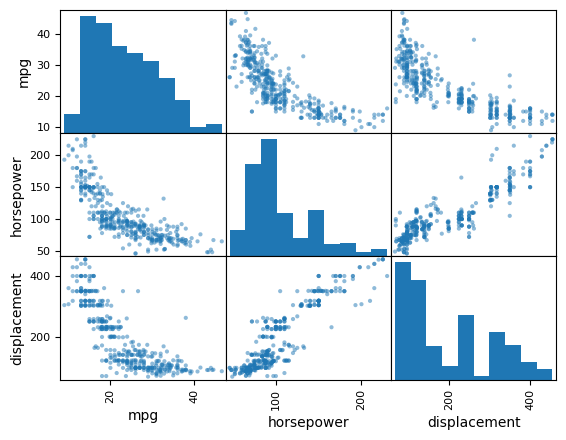

In [61]:
pd.plotting.scatter_matrix(auto[['mpg', 'horsepower', 'displacement']]);

In [63]:
auto['origin'].value_counts()

,count
origin,
1,245
3,79
2,68


<Axes: title={'center': 'mpg'}, xlabel='origin'>

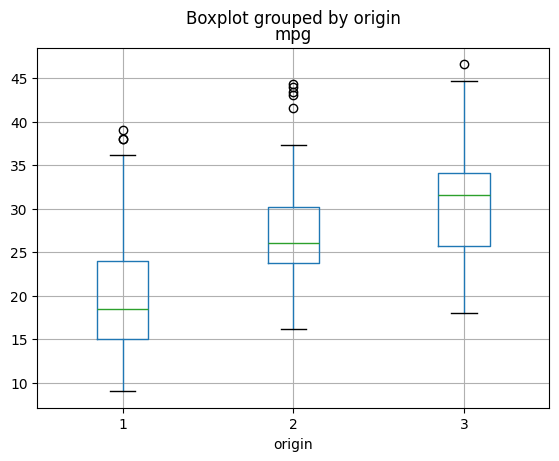

In [65]:
auto.boxplot(column = 'mpg', by = 'origin')

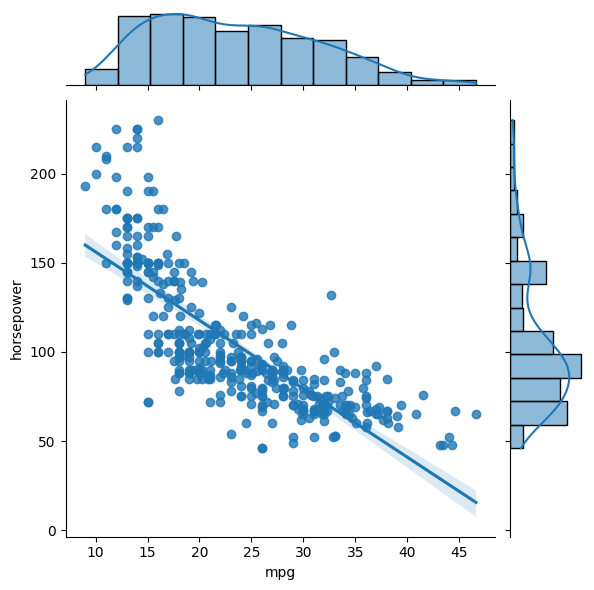

In [67]:
import seaborn as sb
sb.jointplot(x = 'mpg', y = 'horsepower', data = auto, kind = 'reg')

In [68]:
auto.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [76]:
auto.groupby('origin').mean()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year
origin,,,,,,,
1,20.033469,6.277551,247.512245,119.048980,3372.489796,14.990204,75.591837
2,27.602941,4.161765,109.632353,80.558824,2433.470588,16.794118,75.676471
3,30.450633,4.101266,102.708861,79.835443,2221.227848,16.172152,77.443038


In [77]:
auto.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


In [81]:
X = MS(['horsepower']).fit_transform(auto)
y = auto['mpg']
model = sm.OLS(y, X)
result1 = model.fit()
summarize(result1)


,coef,std err,t,P>|t|
intercept,39.9359,0.717,55.660,0.0
horsepower,-0.1578,0.006,-24.489,0.0


In [82]:
y_pred = result1.get_prediction(X)
print(y_pred.conf_int(alpha = 0.02))

[[18.72123111 20.11086026]
 [12.81184999 14.97111005]
 [15.36196103 17.15634101]
 [15.36196103 17.15634101]
 [17.04944277 18.62575393]
 [ 7.1600677  10.20513993]
 [ 3.37678237  7.04325699]
 [ 4.23727689  7.76120981]
 [ 2.51597924  6.32561279]
 [ 8.53349064 11.35723273]
 [11.95836501 14.24614769]
 [13.66382155 15.69758582]
 [15.36196103 17.15634101]
 [ 2.51597924  6.32561279]
 [24.34451315 25.53670956]
 [24.34451315 25.53670956]
 [24.03530062 25.21454316]
 [25.87026331 27.16785406]
 [25.41584666 26.67520231]
 [31.62143968 33.7285669 ]
 [25.56761151 26.83912693]
 [25.11139593 26.34827411]
 [24.34451315 25.53670956]
 [21.50652977 22.69228254]
 [25.11139593 26.34827411]
 [ 4.23727689  7.76120981]
 [ 6.81648403  9.91734467]
 [ 5.09742378  8.47951026]
 [ 8.01863941 10.92501556]
 [25.41584666 26.67520231]
 [25.11139593 26.34827411]
 [24.34451315 25.53670956]
 [23.5686923  24.73408307]
 [22.7833122  23.94101584]
 [23.5686923  24.73408307]
 [25.41584666 26.67520231]
 [23.5686923  24.73408307]
 

In [58]:
print(y_pred.conf_int(obs = True, alpha = 0.05))

[[ 9.75329478 29.07879659]
 [ 4.20373184 23.5792282 ]
 [ 6.58459756 25.93370448]
 [ 6.58459756 25.93370448]
 [ 8.16977485 27.50542185]
 [-1.04719012 18.41239776]
 [-4.55765575 14.97769512]
 [-3.7591362  15.7576229 ]
 [-5.35657708 14.19816911]
 [ 0.22739629 19.66332708]
 [ 3.40928552 22.79522718]
 [ 4.99776635 24.36364102]
 [ 6.58459756 25.93370448]
 [-5.35657708 14.19816911]
 [15.28253274 34.59868997]
 [15.28253274 34.59868997]
 [14.96712492 34.28271885]
 [16.85857452 36.17954285]
 [16.38593648 35.70511249]
 [22.98928828 42.36071829]
 [16.54349911 35.86323933]
 [16.07076137 35.38890867]
 [15.28253274 34.59868997]
 [12.44146802 31.75734428]
 [16.07076137 35.38890867]
 [-3.7591362  15.7576229 ]
 [-1.36599947 18.09982817]
 [-2.96101957 16.53795361]
 [-0.25045142 19.19410639]
 [16.38593648 35.70511249]
 [16.07076137 35.38890867]
 [15.28253274 34.59868997]
 [14.49388849 33.80888688]
 [13.70482857 33.01949947]
 [14.49388849 33.80888688]
 [16.38593648 35.70511249]
 [14.49388849 33.80888688]
 

/tmp/ipykernel_4458/1073583624.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  abline(ax, result1.params[0], result1.params[1], 'r--', linewidth=3)


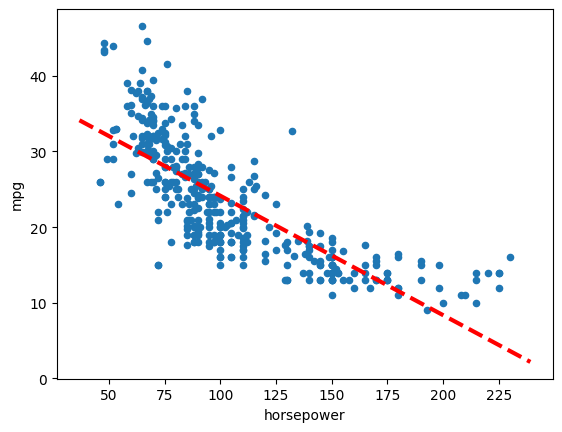

In [83]:
def abline(ax, b, m, *args, **kwargs):
    "Add a line with slope m and intercept b to ax"
    xlim = ax.get_xlim()
    ylim = [m * xlim[0] + b, m * xlim[1] + b]
    ax.plot(xlim, ylim, *args, **kwargs)

ax = auto.plot.scatter('horsepower', 'mpg')
abline(ax, result1.params[0], result1.params[1], 'r--', linewidth=3)

In [84]:
X = MS(auto.columns.drop(['mpg'])).fit_transform(auto)
model = sm.OLS(y, X)
result2 = model.fit()
summarize(result2)

,coef,std err,t,P>|t|
intercept,-17.2184,4.644,-3.707,0.000
cylinders,-0.4934,0.323,-1.526,0.128
displacement,0.0199,0.008,2.647,0.008
horsepower,-0.0170,0.014,-1.230,0.220
weight,-0.0065,0.001,-9.929,0.000
acceleration,0.0806,0.099,0.815,0.415
year,0.7508,0.051,14.729,0.000
origin,1.4261,0.278,5.127,0.000


In [87]:
anova_lm(result1, result2)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,390.0,9385.915872,0.0,NaN,NaN,NaN
1,384.0,4252.212530,6.0,5133.703341,77.267308,5.376746e-63
